## Summary

How to model a Poisson processes using the *poissonprocesses* module.

In [1]:
from poissonprocesses import Events
import numpy as np
import pandas as pd
from seaborn import objects as so

In [2]:
%load_ext watermark
%watermark -iv

seaborn: 0.12.1
numpy  : 1.23.3
pandas : 1.5.1



In [3]:
%precision 4

'%.4f'

## Functions

We'll define a couple of plotting functions that will be used throughout the notebook.

### `plot_n_events(ne: rv_discrete, step: int = 1)`

In [4]:
#| code-fold: true
def plot_n_events(ne, step: int = 1) -> so.Plot:
    """Plot the approximated probability distribution for N(t),
    the number of events in time.

    It's approximate because the event space is 0.01-to-0.99-quantiles.

    Pass step to reduce the number of events plotted, if the returned
    plot is cluttered.
    """
    ns = np.arange(ne.ppf(0.01), ne.ppf(0.99), step=step)
    return (
        so.Plot(x=ns, y=ne.pmf(ns))
        .add(so.Bar())
        .label(x='n', y='p(n)', title='Probability distribution')
    )

### `plot_n_events(ne: rv_discrete, step: int = 1)`

In [5]:
#| code-fold: true
def plot_waiting_time(wt) -> so.Plot:
    """Plot the approximate probability distribution for T, the waiting
    time between events.

    It's approximate because the event space is 0.01-to-0.99-quantiles.
    """
    ts = np.linspace(wt.ppf(0.01), wt.ppf(0.99))
    return(
        so.Plot(x=ts, y=wt.pdf(ts))
        .add(so.Line())
        .label(x='t', y='f(t)', title='Probability distribution')
    )

### 1. Nerve impulses

*M343 Book 2, Activity 3.1*

Initialise *impulses*, `Event`, a Poisson process model for the incidence of impulses.

In [6]:
impulses = Events(458)  # per second
print(impulses)

Events(rate=458)


Plot the models for $N(t)$, the *number of events in time*, and $T$, the *time between events*.

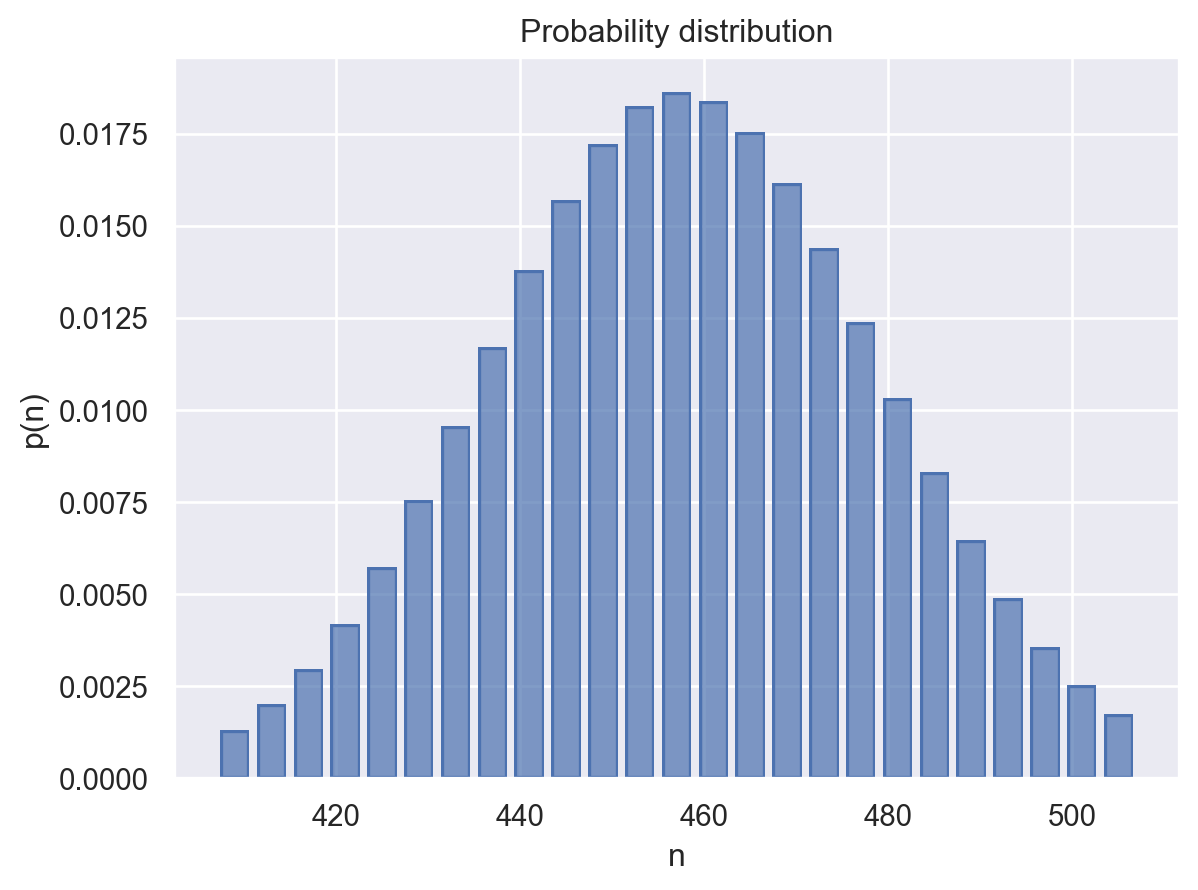

In [7]:
plot_n_events(impulses.n_events(), step=4)

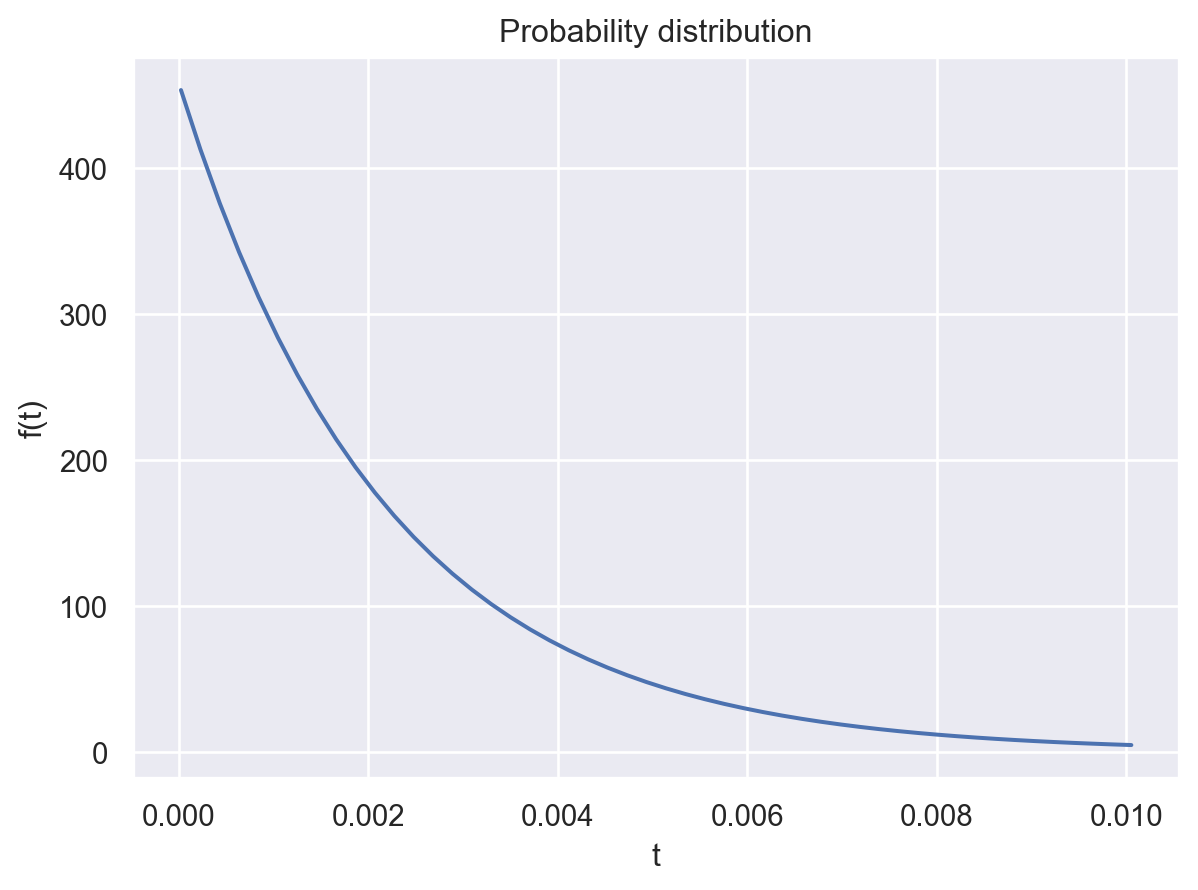

In [8]:
plot_waiting_time(impulses.waiting_time())

**(a)**
Return the probability that not more than one nerve impulse occurs in an interval of 1/100 second.

In [9]:
impulses.n_events(0.01).cdf(1)

0.0572

**(b)**
Return the probability that the interval between two successive impulses is less than 1/1000 second.

In [10]:
impulses.waiting_time().cdf(0.001)

0.3675

### 2. Major earthquakes

*M343 Book 2, Activity 3.2*

Initialise *earthquakes*, `Event`, a Poisson process model for the incidence of major earthquakes worldwide.

In [11]:
earthquakes = Events(12/14)  # per year

Plot the probability distribution for the number of earthquakes expected in 10 years.

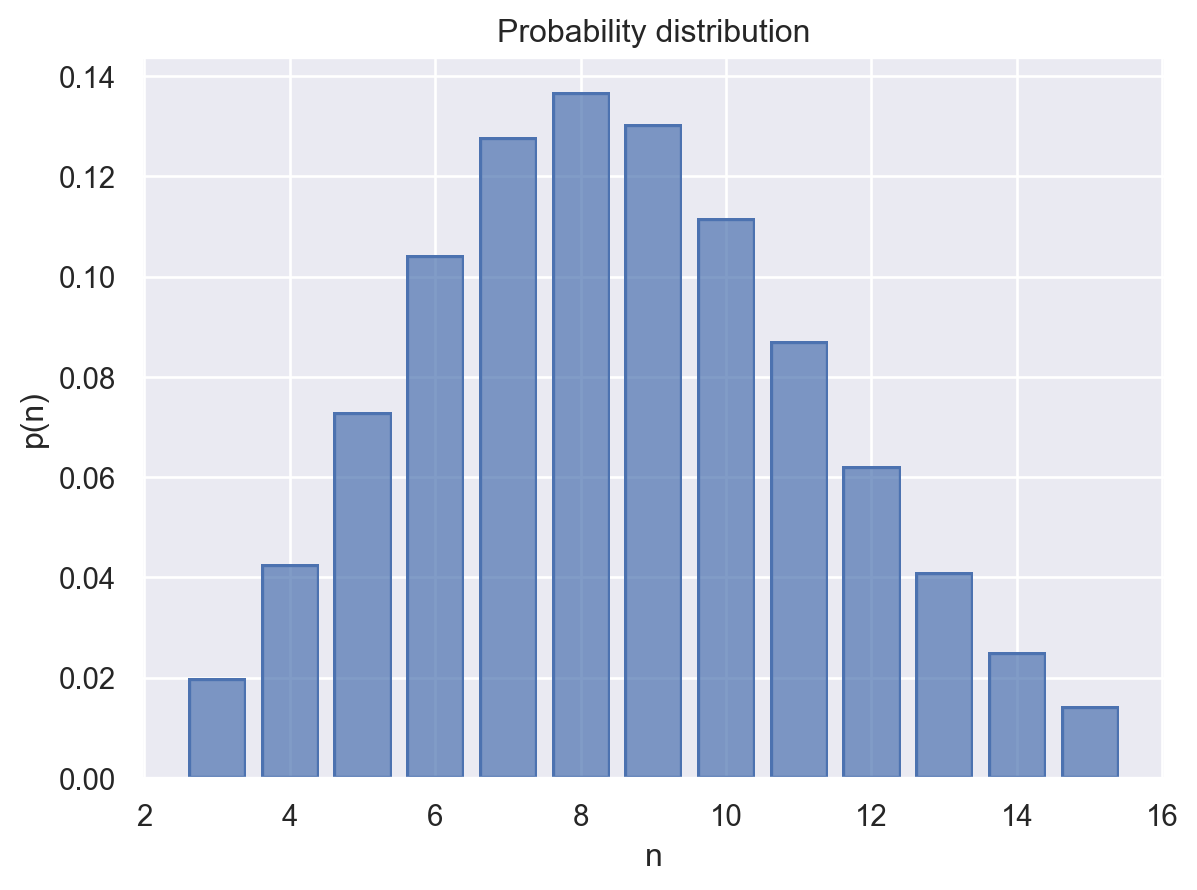

In [12]:
plot_n_events(earthquakes.n_events(10))

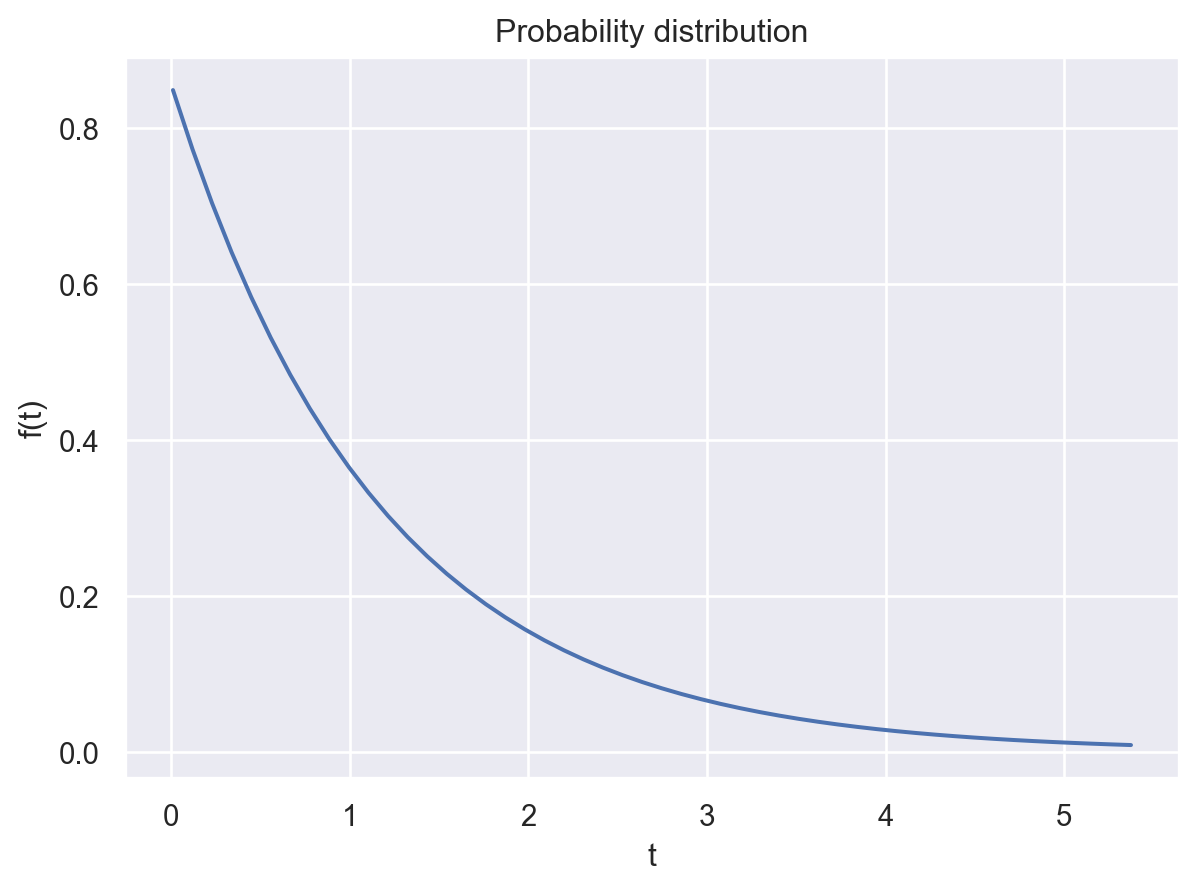

In [13]:
plot_waiting_time(earthquakes.waiting_time())

**(a)**
Return the probability that there will be at least three major earthquakes in a period of ten years.

In [14]:
earthquakes.n_events(1).sf(2)

0.0560

**(b)**
Return the probability that the waiting time between successive major earthquakes exceeds two years.

In [15]:
earthquakes.waiting_time().sf(0.001)

0.9991

### 3. Some poisson process

*M343 Book 2, Exercise 3.1*

Initialise *events*, `Events`, a Poisson process model for the incidence ofsome event.

In [16]:
events = Events(60/16)  # per hour

Plot the models.

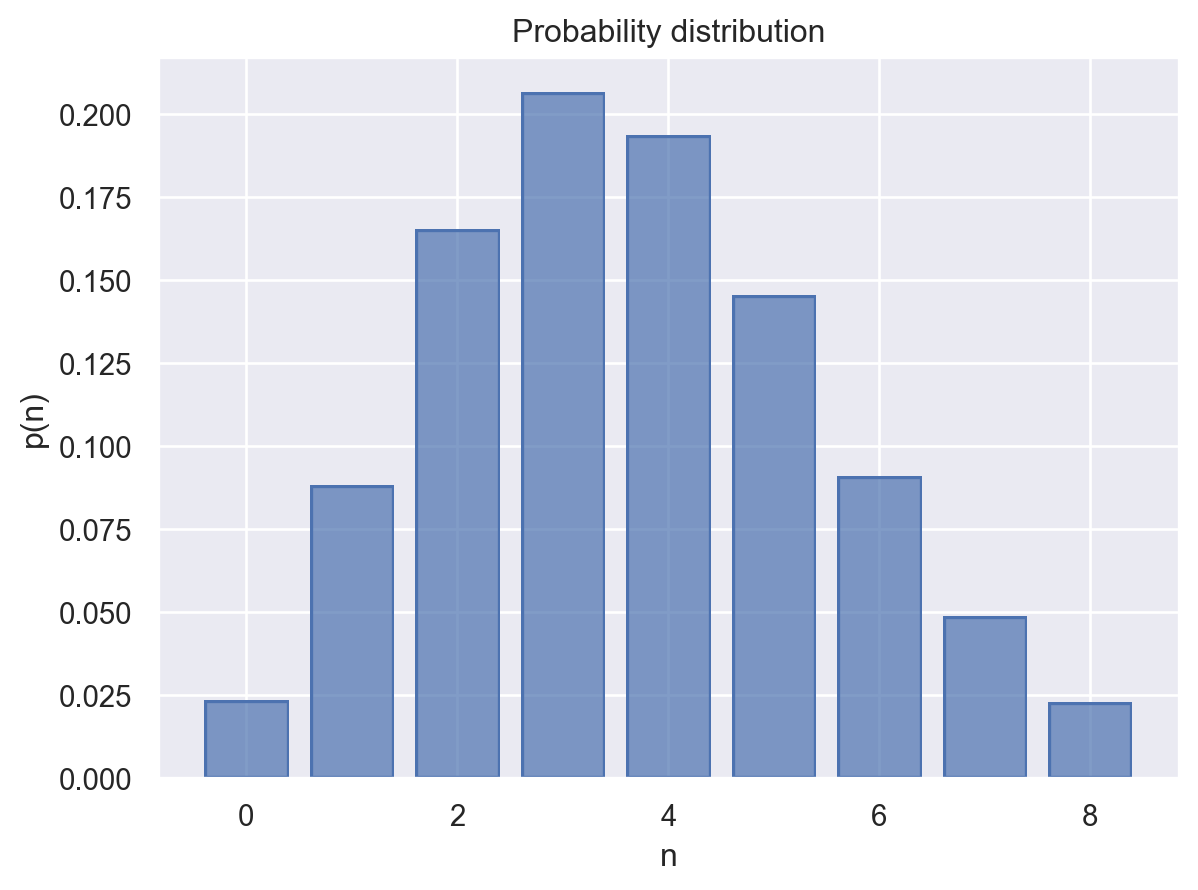

In [17]:
plot_n_events(events.n_events())

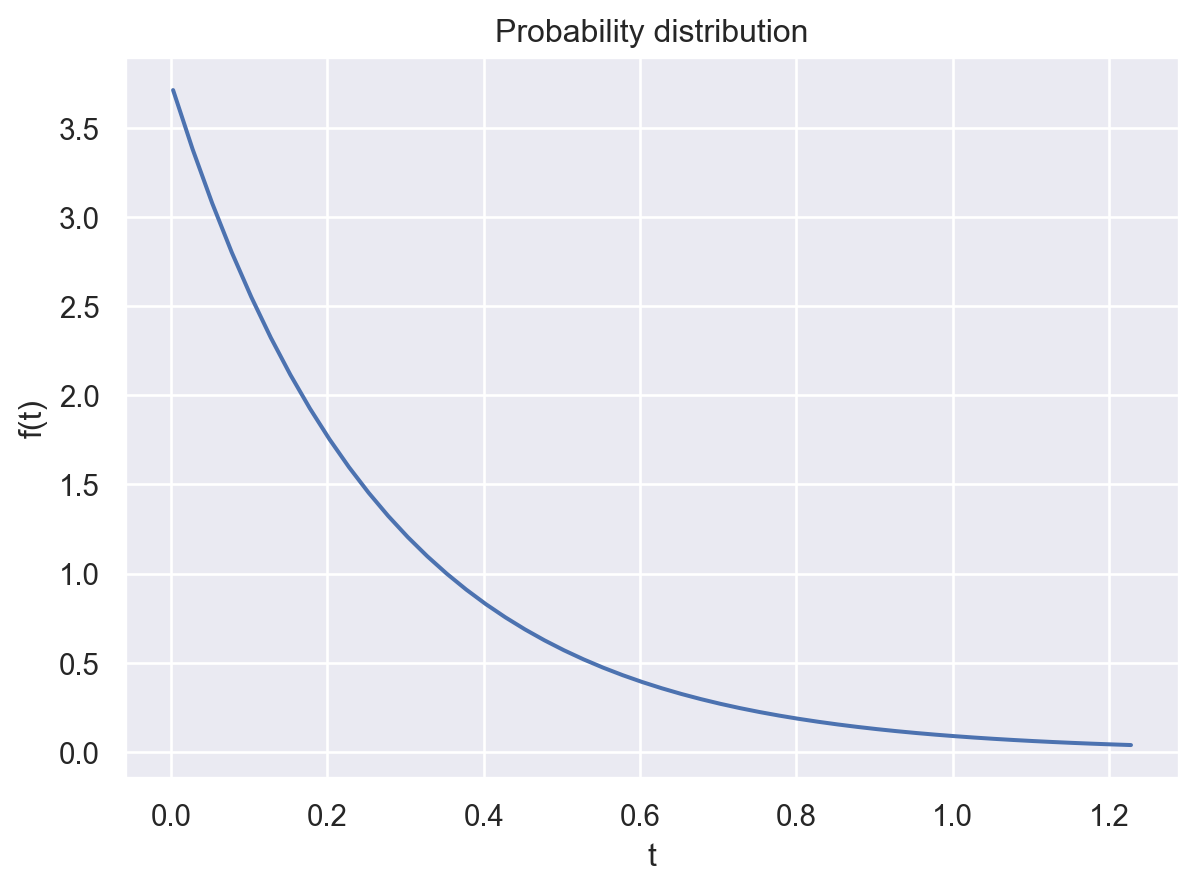

In [18]:
plot_waiting_time(events.waiting_time())

**(c)**
If there were seven events between 2pm and 3pm yesterday, calculate the probability that there was at most one event between 3pm and 4pm.

(These are *independent events* and Poisson processes are memoryless, so what happened between 2pm and 3pm has no bearing on the events between 3pm and 4pm.)

In [19]:
events(1).cdf(1)

0.1117

**(d)**
Return the probability that the waiting time between successive events will exceed half an hour.

In [20]:
events[:].sf(0.5)

0.1534

### 4. Volcanic eruptions

*M343 Book 2, Exercise 3.2*

Initialise *eruptions*, `Events`, a Poisson process model for the incidence of major volcanic eruptions in the northern hemisphere.

In [21]:
eruptions = Events(12/29)  # per year

Plot the models.

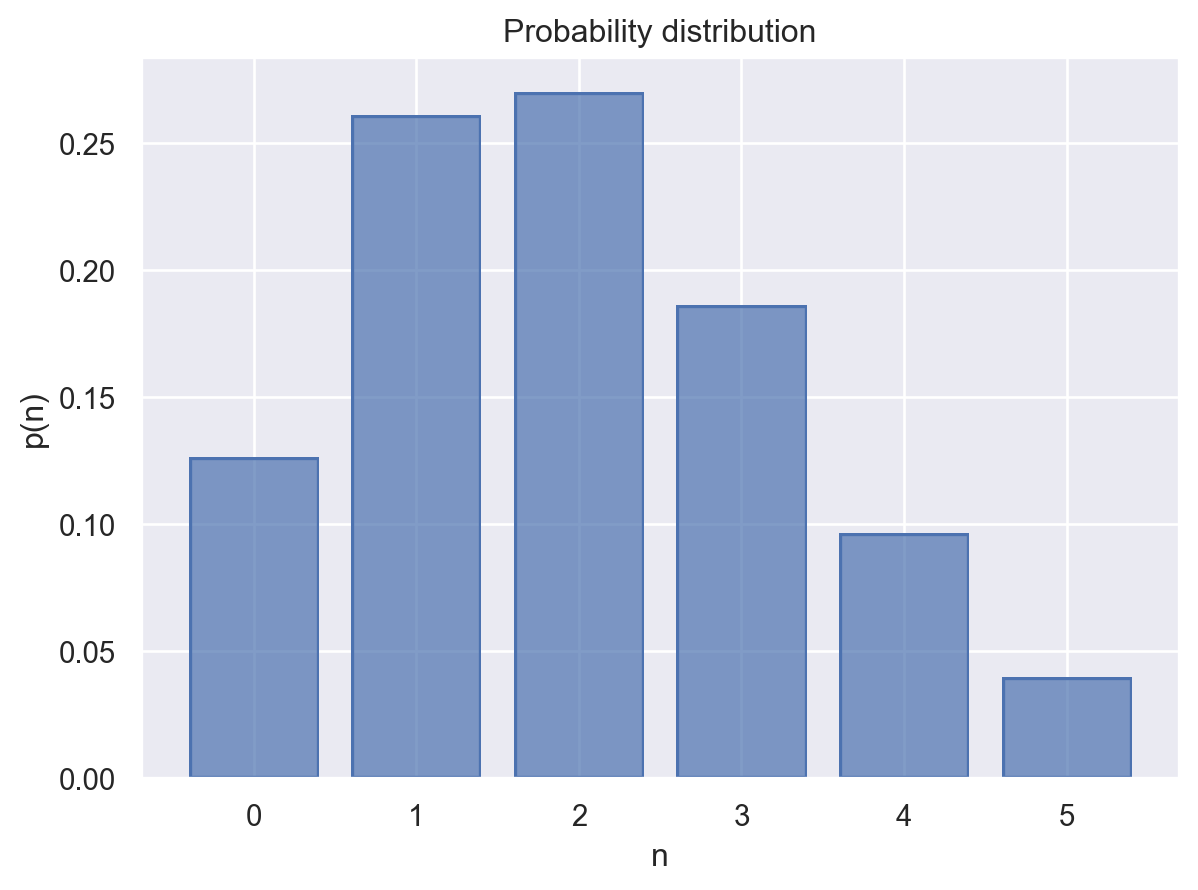

In [22]:
plot_n_events(eruptions.n_events(5))

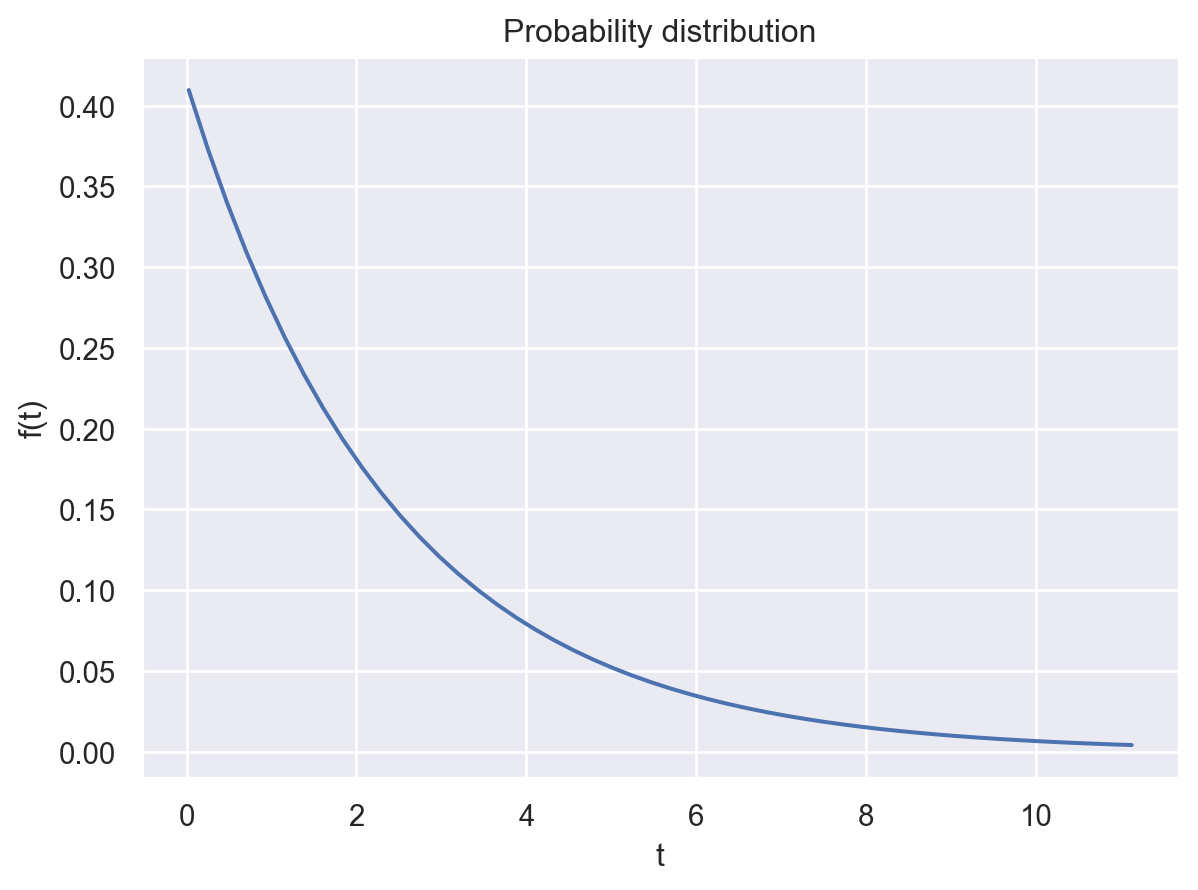

In [23]:
plot_waiting_time(eruptions.waiting_time())

**(a)**
Return the expected number of eruptions during a five-year period.

In [24]:
eruptions.n_events(5).mean()

2.0690

**(b)**
Return the probability that there are exactly two eruptions during a five-year period.

In [25]:
eruptions.n_events(5).pmf(2)

0.2704

**(c)**
Return the probability that at least three years pass after you have read this exercise before the next eruption.

In [26]:
eruptions.waiting_time().sf(3)

0.2890